<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/XGBwithXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **EXTREME GRADIENT BOOSTING WITH XGBOOST**



**Description**

Do you know the basics of supervised learning and want to use state-of-the-art models on real-world datasets? Gradient boosting is currently one of the most popular techniques for efficient modeling of tabular datasets of all sizes. XGboost is a very fast, scalable implementation of gradient boosting, with models using XGBoost regularly winning online data science competitions and being used at scale across different industries. In this course, you'll learn how to use this powerful library alongside pandas and scikit-learn to build and tune supervised learning models. You'll work with real-world datasets to solve classification and regression problems.

# **1. Classification with XGBoost**

This chapter will introduce you to the fundamental idea behind XGBoost—boosted learners. Once you understand how XGBoost works, you'll apply it to solve a common classification problem found in industry: predicting whether a customer will stop being a customer at some point in the future.

**Quest**

Which of these is a classification problem?
Given below are 4 potential machine learning problems you might encounter in the wild. Pick the one that is a classification problem.

- Given past performance of stocks and various other financial data, predicting the exact price of a given stock (Google) tomorrow. - Reg.  This is an example of a regression problem, because we are predicting a continuous quantity.

- Given a large dataset of user behaviors on a website, generating an informative segmentation of the users based on their behaviors. Clustering. this is an unsupervised (clustering) problem.

- Predicting whether a given user will click on an ad given the ad content and metadata associated with the user. - Class

- Given a user's past behavior on a video platform, presenting him/her with a series of recommended videos to watch next. - Ranking: Cosine similarity etc This problem involves ranking entities and returning the highest ranked ones (in order) to the user.

Well done! This is indeed a classification problem.

**Which of these is a binary classification problem?**

Great! A classification problem involves predicting the category a given data point belongs to out of a finite set of possible categories. Depending on how many possible categories there are to predict, a classification problem can be either binary or multi-class. Let's do another quick refresher here. Your job is to pick the binary classification problem out of the following list of supervised learning problems.


- Predicting whether a given image contains a cat.

- Predicting the emotional valence of a sentence (Valence can be positive, negative, or neutral).

- Recommending the most tax-efficient strategy for tax filing in an automated accounting system

- Given a list of symptoms, generating a rank-ordered list of most likely diseases.

Correct! A binary classification problem involves picking between 2 choices.



In [ ]:
import pandas as pd
import numpy as np


url = "https://assets.datacamp.com/production/repositories/943/datasets/4dbcaee889ef06fb0763e4a8652a4c1f268359b2/ames_housing_trimmed_processed.csv"

housing_data_proc = pd.read_csv(url)
# to csv
housing_data_proc.to_csv('housing_data_proc.csv', index=False)
housing_data_proc.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [ ]:
url = "https://assets.datacamp.com/production/repositories/943/datasets/17a7c5c0acd7bfa253827ea53646cf0db7d39649/ames_unprocessed_data.csv"

housing_data = pd.read_csv(url)
# to csv
housing_data.to_csv('housing_data.csv', index=False)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000


In [ ]:
url = "https://assets.datacamp.com/production/repositories/943/datasets/82c231cd41f92325cf33b78aaa360824e6b599b9/chronic_kidney_disease.csv"

kidney_data = pd.read_csv(url)
kidney_data.head()

,48,80,1.020,1,0,?,normal,notpresent,notpresent.1,121,...,44,7800,5.2,yes,yes.1,no,good,no.1,no.2,ckd
0,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
1,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
2,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
3,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
4,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd


**XGBoost: Fit/Predict**

It's time to create your first XGBoost model! As Sergey showed you in the video, you can use the scikit-learn .fit() / .predict() paradigm that you are already familiar to build your XGBoost models, as the xgboost library has a scikit-learn compatible API!

Here, you'll be working with churn data. This dataset contains imaginary data from a ride-sharing app with user behaviors over their first month of app usage in a set of imaginary cities as well as whether they used the service 5 months after sign-up. It has been pre-loaded for you into a DataFrame called churn_data - explore it in the Shell!

Your goal is to use the first month's worth of data to predict whether the app's users will remain users of the service at the 5 month mark. This is a typical setup for a churn prediction problem. To do this, you'll split the data into training and test sets, fit a small xgboost model on the training set, and evaluate its performance on the test set by computing its accuracy.

pandas and numpy have been imported as pd and np, and train_test_split has been imported from sklearn.model_selection. Additionally, the arrays for the features and the target have been created as X and y.

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv" # Replace with desired dataset's raw url if different
churn_data = pd.read_csv(url)
print(churn_data.info())

# save csv
churn_data.to_csv('churn_data.csv', index=False)
churn_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
# select object data and create dummies. Dummies in sparse vector
cat_columns = [c for c in churn_data.columns if churn_data[c].dtype.name == 'object']
#print(cat_columns)
print(f'Lenght of columns: {len(cat_columns)}')

dummies = pd.get_dummies(churn_data[cat_columns]).astype(int)# dtype="Sparse[int8]")# sparse= True )#.astype(np.int8)

#dummies = pd.get_dummies(churn_data[cat_columns], sparse=True, dtype=pd.SparseDtype("int", 0))
#print(dummies.info())
dummies.head()

Lenght of columns: 10


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# select numeric except y
X = churn_data.select_dtypes(include=['int64', 'float64']).drop(['y'], axis=1)
y = churn_data['y']

X = pd.concat([X, dummies], axis=1)
#print(X.head() )


churn_data = pd.concat([X, y], axis=1)
churn_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,1,0,0,0,1,0,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,1,0,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,1,0,0,0,0,1,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,1,0,0,0,0,0,1,0,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
#import xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Create arrays for the features and the target: X, y
#X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Instantiate the XGBClassifier: xg_cl
#xg_cl = xgb.XGBClassifier(objective='reg:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# predict proba
preds_proba = xg_cl.predict_proba(X_test)

# print first five along side actual
print(preds[:5])
print(y_test[:5])
print(preds_proba[:5])

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))  # Well done! Your model has an accuracy of around 74%. In Chapter 3, you'll learn about ways to fine tune your XGBoost models. For now, let's refresh our memories on how decision trees work. See you in the next video!


[1 0 0 0 0]
8107     1
38463    0
1933     0
8352     0
37164    0
Name: y, dtype: int64
[[0.22123349 0.7787665 ]
 [0.9909572  0.00904277]
 [0.90295213 0.09704785]
 [0.9901764  0.00982364]
 [0.990819   0.00918101]]
accuracy: 0.920005


**DT tend to Overfit**: That is, they are very good at learning relationships within any data you train them on, but they tend to overfit the data you use to train them on and usually generalize to new data poorly. XGBoost uses a slightly different kind of a decision tree,

**Decision trees**

Your task in this exercise is to make a simple decision tree using scikit-learn's DecisionTreeClassifier on the breast cancer dataset that comes pre-loaded with scikit-learn.

This dataset contains numeric measurements of various dimensions of individual tumors (such as perimeter and texture) from breast biopsies and a single outcome value (the tumor is either malignant, or benign).

We've preloaded the dataset of samples (measurements) into X and the target values per tumor into y. Now, you have to split the complete dataset into training and testing sets, and then train a DecisionTreeClassifier. You'll specify a parameter called max_depth. Many other parameters can be modified within this model, and you can check all of them out here [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).



In [ ]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy) # Great work! It's now time to learn about what gives XGBoost its state-of-the-art performance: Boosting.


accuracy: 0.91442097596504


**Measuring accuracy**

You'll now practice using XGBoost's learning API through its baked in cross-validation capabilities. As Sergey discussed in the previous video, XGBoost gets its lauded performance and efficiency gains by utilizing its own optimized data structure for datasets called a DMatrix.

In the previous exercise, the input datasets were converted into DMatrix data on the fly, but when you use the xgboost cv object, you have to first explicitly convert your data into a DMatrix. So, that's what you will do here before running cross-validation on churn_data.

In [ ]:
churn_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,1,0,0,0,1,0,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,1,0,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,1,0,0,0,0,1,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,1,0,0,0,0,0,1,0,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,1,0,0,0,0,0,0,1,1


In [ ]:
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params,
                    nfold=3, num_boost_round=5,
                    metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1])) # Nice work. cv_results stores the training and test mean and standard deviation of the error per boosting round (tree built) as a DataFrame. From cv_results, the final round 'test-error-mean' is extracted and converted into an accuracy, where accuracy is 1-error. The final accuracy of around 75% is an improvement from earlier!

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.112654         0.000136         0.112654        0.000272
1          0.098597         0.000192         0.098888        0.001278
2          0.094712         0.000421         0.094736        0.000481
3          0.092272         0.000883         0.093134        0.000209
4          0.090087         0.000625         0.090415        0.000429
0.9095853224888647


**Measuring AUC**

Now that you've used cross-validation to compute average out-of-sample accuracy (after converting from an error), it's very easy to compute any other metric you might be interested in. All you have to do is pass it (or a list of metrics) in as an argument to the metrics parameter of xgb.cv().

Your job in this exercise is to compute another common metric used in binary classification - the area under the curve ("auc"). As before, churn_data is available in your workspace, along with the DMatrix churn_dmatrix and parameter dictionary params.

**Higher AUC means a more sensitive better performing model**

In [ ]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params,
                    nfold=3, num_boost_round=5,
                    metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

# Fantastic! An AUC of 0.84 is quite strong. As you have seen, XGBoost's learning API makes it very easy to compute
# any metric you may be interested in. In Chapter 3, you'll learn about techniques to fine-tune your XGBoost models to improve their performance even further. For now, it's time to learn a little about exactly when to use XGBoost.

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.894575       0.006999       0.894048      0.006621
1        0.920872       0.003213       0.918233      0.002726
2        0.929000       0.004143       0.927205      0.001036
3        0.934467       0.001648       0.932342      0.001489
4        0.938695       0.000548       0.936738      0.001938
0.9367384111542889


**When should we use XGB ?**

- Use it for Supervised learning task: You should consider using XGBoost for any supervised machine learning task that fits the following criteria: You have a large number of training examples.

Although your definition of large can vary, I intend it to mean a dataset that has few features and at least 1000 examples. However, in general, as long as the number of features in your training set is smaller than the number of examples you have, you should be fine.

- Finally, XGBoost tends to do well when you have a mixture of categorical and numeric features, or when you have just numeric features.

**When to NOT use XGBoost**

- The most important kinds of problems where XGBoost is a suboptimal choice involve either those that have found success using other state-of-the-art algorithms or those that suffer from dataset size issues.

Specifically, XGBoost is not ideally suited for image recognition, computer vision, or natural language processing and understanding problems, as those kinds of problems can be much better tackled using deep learning approaches.

- In terms of dataset size problems, XGBoost is not suitable when you have very small training sets ( less than 100 training examples) or when the number of training examples is significantly smaller than the number of features being used for training.

**Using XGBoost**

XGBoost is a powerful library that scales very well to many samples and works for a variety of supervised learning problems. That said, as Sergey described in the video, you shouldn't always pick it as your default machine learning library when starting a new project, since there are some situations in which it is not the best option. In this exercise, your job is to consider the below examples and select the one which would be the best use of XGBoost.

- Visualizing the similarity between stocks by comparing the time series of their historical prices relative to each other. - Clustering.

- Predicting whether a person will develop cancer using genetic data with millions of genes, 23 examples of genomes of people that didn't develop cancer, 3 genomes of people who wound up getting cancer.

- Clustering documents into topics based on the terms used in them.

- Predicting the likelihood that a given user will click an ad from a very large clickstream log with millions of users and their web interactions.

# **3. Regression with XGBoost**



After a brief review of supervised regression, you'll apply XGBoost to the regression task of predicting house prices in Ames, Iowa. You'll learn about the two kinds of base learners that XGboost can use as its weak learners, and review how to evaluate the quality of your regression models.

**Which of these is a regression problem?**

Here are 4 potential machine learning problems you might encounter in the wild. Pick the one that is a clear example of a regression problem.

- Recommending a restaurant to a user given their past history of restaurant visits and reviews for a dining aggregator app.

- Predicting which of several thousand diseases a given person is most likely to have given their symptoms. - This is a multi-class classification problem.

- Tagging an email as spam/not spam based on its content and metadata (sender, time sent, etc.).

- Predicting the expected payout of an auto insurance claim given claim properties (car, accident type, driver prior history, etc.).

Well done! This is indeed an example of a regression problem.



**Decision trees as base learners**

It's now time to build an XGBoost model to predict house prices - not in Boston, Massachusetts, as you saw in the video, but in Ames, Iowa! This dataset of housing prices has been pre-loaded into a DataFrame called df. If you explore it in the Shell, you'll see that there are a variety of features about the house and its location in the city.

In this exercise, your goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so you don't have to specify that you want to use trees here with booster="gbtree".

xgboost has been imported as xgb and the arrays for the features and the target are available in X and y, respectively.

In [ ]:
housing_data_proc.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [ ]:
#
X = housing_data_proc.drop('SalePrice', axis=1)
y = housing_data_proc['SalePrice']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
from sklearn.metrics import mean_squared_error
# Instantiate the XGBRegressor: xg_reg

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse)) # Well done! Next, you'll train an XGBoost model using linear base learners and XGBoost's learning API. Will it perform better or worse?

RMSE: 31292.976337


**Linear base learners**

Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as xgb.train().

In order to do this you must create the parameter dictionary that describes the kind of booster you want to use (similarly to how you created the dictionary in Chapter 1 when you used xgb.cv()). The key-value pair that defines the booster type (base model) you need is "booster":"gblinear".

Once you've created the model, you can use the .train() and .predict() methods of the model just like you've done in the past.

Here, the data has already been split into training and testing sets, so you can dive right into creating the DMatrix objects required by the XGBoost learning API.

In [ ]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse)) # Interesting - it looks like linear base learners performed better!

RMSE: 44779.735417


**Evaluating model quality**

It's now time to begin evaluating model quality.

Here, you will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data. As in previous exercises, all necessary modules have been pre-loaded and the data is available in the DataFrame df.

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final round boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     61729.274347      679.377718    63760.373921    2933.496745
1     49654.722560      757.696043    53641.473273    3504.687699
2     41325.179705      702.570217    46796.539109    3500.230673
3     35351.338939      772.520024    41986.507917    4018.899377
4     31020.037762      574.099506    39337.103754    4583.588151
4    39337.103754
Name: test-rmse-mean, dtype: float64


In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final round boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

# Great Work

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0    43978.370783     265.516103   44551.030843    875.854839
1    34677.517623     229.638967   35869.958037   1015.100363
2    28338.053913     290.958119   30144.292723    902.020896
3    24076.657948     451.048602   26492.798309    835.506913
4    21115.815254     428.025143   24289.425664    994.137976
4    24289.425664
Name: test-mae-mean, dtype: float64


**Using regularization in XGBoost**

Having seen an example of l1 regularization in the video, you'll now vary the l2 regularization penalty - also known as "lambda" - and see its effect on overall model performance on the Ames housing dataset.

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg

    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2","rmse"])) # Nice work! It looks like as as the value of 'lambda' increases, so does the RMSE.Nice work! It looks like as as the value of 'lambda' increases, so does the RMSE.

Best rmse as a function of l2:
    l2          rmse
0    1  40871.470438
1   10  42944.793376
2  100  52222.078307


**Visualizing individual XGBoost trees**

Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.

XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

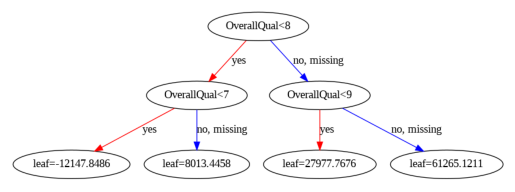

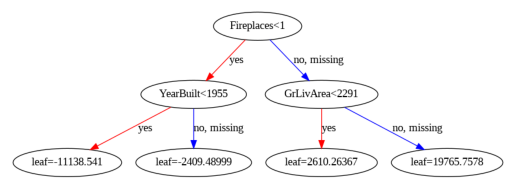

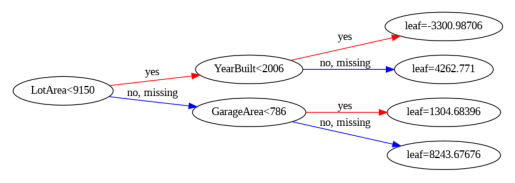

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
from matplotlib import pyplot as plt
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir='LR')
plt.show()

# Excellent! Have a look at each of the plots. They provide insight into how the model arrived at its
# final decisions and what splits it made to arrive at those decisions. This allows us to identify which
# features are the most important in determining house price. In the next exercise, you'll learn another way of visualizing feature importances.

**Visualizing feature importances:**

 What features are most important in my dataset
Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this, and you'll get a chance to use it in this exercise!

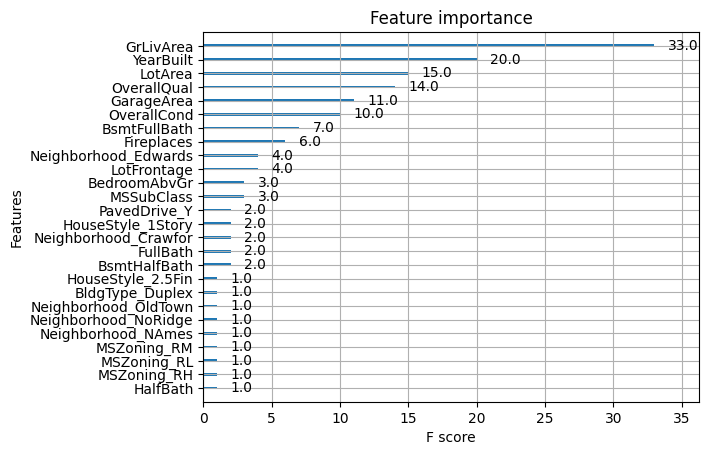

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show() # Brilliant! It looks like GrLivArea is the most important feature. Congratulations on completing Chapter 2!

# **3. Fine Tuning your XGBoost Model**

This chapter will teach you how to make your XGBoost models as performant as possible. You'll learn about the variety of parameters that can be adjusted to alter the behavior of XGBoost and how to tune them efficiently so that you can supercharge the performance of your models.

**When is tuning your model a bad idea?**

Now that you've seen the effect that tuning has on the overall performance of your XGBoost model, let's turn the question on its head and see if you can figure out when tuning your model might not be the best idea. Given that model tuning can be time-intensive and complicated, which of the following scenarios would NOT call for careful tuning of your model?

- You have lots of examples from some dataset and very many features at your disposal.

- You are very short on time before you must push an initial model to production and have little data to train your model on. - True!

- You have access to a multi-core (64 cores) server with lots of memory (200GB RAM) and no time constraints.

- You must squeeze out every last bit of performance out of your xgboost model.


Yup! You cannot tune if you do not have time!

**Tuning the number of boosting rounds**

Let's start with parameter tuning by seeing how the number of boosting rounds (number of trees you build) impacts the out-of-sample performance of your XGBoost model. You'll use xgb.cv() inside a for loop and build one model per num_boost_round parameter.

Here, you'll continue working with the Ames housing dataset. The features are available in the array X, and the target vector is contained in y.

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)

    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))
# Awesome! As you can see, increasing the number of boosting rounds decreases the RMSE.

   num_boosting_rounds          rmse
0                    5  40350.042785
1                   10  34222.544068
2                   15  32537.190260


**Automated boosting round selection using early_stopping**

Now, instead of attempting to cherry pick the best possible number of boosting rounds, you can very easily have XGBoost automatically select the number of boosting rounds for you within xgb.cv(). This is done using a technique called early stopping.

Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds. Here you will use the early_stopping_rounds parameter in xgb.cv() with a large possible number of boosting rounds (50). Bear in mind that if the holdout metric continuously improves up through when num_boost_rounds is reached, then early stopping does not occur.

Here, the DMatrix and parameter dictionary have been created for you. Your task is to use cross-validation with early stopping. Go for it!

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Great work!

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0      61708.384075      789.992240    63420.791562    2613.472325
1      49522.546344      802.013790    53085.413747    2315.613545
2      41169.937732      688.760982    46216.723045    2275.292419
3      35291.530581      733.718357    41684.086762    2912.197343
4      31046.377888      516.077566    38496.489124    2817.930645
5      27696.206636      582.478240    36362.599330    2671.301364
6      25408.301944      330.625199    35302.558898    2856.045380
7      23639.812549      423.028610    34090.701206    2644.890618
8      22255.018210      457.633545    33549.535045    2224.370383
9      21042.204957      457.772868    33339.326024    2026.857986
10     20190.735243      444.843073    33050.944991    1820.593939
11     19405.436763      422.811600    32872.225752    1607.504842
12     18825.729259      345.778797    32827.872247    1598.434460
13     18276.857540      286.175363    32595.274062    1458.33

**Tuning eta**

It's time to practice tuning other XGBoost hyperparameters in earnest and observing their effect on model performance! You'll begin by tuning the "eta", also known as the learning rate.

The learning rate in XGBoost is a parameter that can range between 0 and 1, with higher values of "eta" penalizing feature weights more strongly, causing much stronger regularization.

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta
for curr_val in eta_vals:

    params["eta"] = curr_val

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3,
                        num_boost_round=10, early_stopping_rounds=5,
                        metrics="rmse", as_pandas=True, seed=123)

    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta     best_rmse
0  0.001  78903.745397
1  0.010  74293.709019
2  0.100  47136.241898


**Tuning max_depth**

In this exercise, your job is to tune max_depth, which is the parameter that dictates the maximum depth that each tree in a boosting round can grow to. Smaller values will lead to shallower trees, and larger values to deeper trees.

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:squarederror"}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val

    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)

    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

   max_depth     best_rmse
0          2  37140.345524
1          5  34301.329122
2         10  35733.363167
3         20  35937.767774


**Tuning colsample_bytree**

Now, it's time to tune "colsample_bytree". You've already seen this if you've ever worked with scikit-learn's RandomForestClassifier or RandomForestRegressor, where it just was called max_features. In both xgboost and sklearn, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree. In xgboost, colsample_bytree must be specified as a float between 0 and 1.

In [ ]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:squarederror","max_depth":3}

# Create list of hyperparameter values
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value
for curr_val in colsample_bytree_vals:

    params["colsample_bytree"] = curr_val

    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)

    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))


# Awesome! There are several other individual parameters that you can tune, such as "subsample",
# which dictates the fraction of the training data that is used during any given boosting round. Next up: Grid Search and Random Search to tune XGBoost hyperparameters more efficiently!

   colsample_bytree     best_rmse
0               0.1  47958.123027
1               0.5  35066.230191
2               0.8  35199.444917
3               1.0  34786.230629


**Grid search with XGBoost**

Now that you've learned how to tune parameters individually with XGBoost, let's take your parameter tuning to the next level by using scikit-learn's GridSearch and RandomizedSearch capabilities with internal cross-validation using the GridSearchCV and RandomizedSearchCV functions. You will use these to find the best model exhaustively from a collection of possible parameter values across multiple parameters simultaneously. Let's get to work, starting with GridSearchCV!

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

# Excellent work! Next up, RandomizedSearchCV.

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 2, 'n_estimators': 50}
Lowest RMSE found:  30948.246864725632


**As a brief aside, neg_mean_squared_error is scikit-learn's API-specific way of calculating the mean squared error in an API-compatible way. Negative mean squared errors don't actualy exist as all squares must be positive when working with real numbers.**

**Random search with XGBoost**

Often, GridSearchCV can be really time consuming, so in practice, you may want to use RandomizedSearchCV instead, as you will do in this exercise. The good news is you only have to make a few modifications to your GridSearchCV code to do RandomizedSearchCV. The key difference is you have to specify a param_distributions parameter instead of a param_grid parameter.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid,
                                    n_iter=5, scoring='neg_mean_squared_error', cv=4, verbose=1)
randomized_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

# Superp!

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 25, 'max_depth': 4}
Lowest RMSE found:  31628.848856700428


**When should you use grid search and random search?**

Now that you've seen some of the drawbacks of grid search and random search, which of the following most accurately describes why both random search and grid search are non-ideal search hyperparameter tuning strategies in all scenarios?

- Grid Search and Random Search both take a very long time to perform, regardless of the number of parameters you want to tune.

- Grid Search and Random Search both scale exponentially in the number of hyperparameters you want to tune.

- The search space size can be massive for Grid Search in certain cases, whereas for Random Search the number of hyperparameters has a significant effect on how long it takes to run.

- Grid Search and Random Search require that you have some idea of where the ideal values for hyperparameters reside.

Answer

- The search space size can be massive for Grid Search in certain cases, whereas for Random Search the number of hyperparameters has a significant effect on how long it takes to run.

This is why random search and grid search should not always be used. Nice!

# **4. Using XGBooost in Pipeline**

Take your XGBoost skills to the next level by incorporating your models into two end-to-end machine learning pipelines. You'll learn how to tune the most important XGBoost hyperparameters efficiently within a pipeline, and get an introduction to some more advanced preprocessing techniques.

**Exploratory data analysis**

Before diving into the nitty gritty of pipelines and preprocessing, let's do some exploratory analysis of the original, unprocessed Ames housing dataset [Link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). When you worked with this data in previous chapters, we preprocessed it for you so you could focus on the core XGBoost concepts. In this chapter, you'll do the preprocessing yourself!

A smaller version of this original, unprocessed dataset has been pre-loaded into a pandas DataFrame called df. Your task is to explore df in the Shell and pick the option that is incorrect. The larger purpose of this exercise is to understand the kinds of transformations you will need to perform in order to be able to use XGBoost.

Can you answer whether the following is true:



The DataFrame has 21 columns and 1460 rows.

The mean of the LotArea column is 10516.828082.

The DataFrame has missing values.

The LotFrontage column has no missing values and its entries are of type float64.

The standard deviation of SalePrice is 79442.502883.


In [ ]:
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Neighborhood  1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   HouseStyle    1460 non-null   object 
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  Remodeled     1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  BsmtHalfBath  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageArea    1460 non-null 

In [ ]:
housing_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,0.476712,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,0.613014,472.980137,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,0.499629,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.644666,213.804841,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,334.500000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,480.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,1.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,576.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,1418.000000,755000.000000


**Encoding categorical columns I: LabelEncoder**

Now that you've seen what will need to be done to get the housing data ready for XGBoost, let's go through the process step-by-step.

First, you will need to fill in missing values - as you saw previously, the column LotFrontage has many missing values. Then, you will need to encode any categorical columns in the dataset using one-hot encoding so that they are encoded numerically. You can watch this video from Supervised Learning with scikit-learn for a refresher on the idea.

The data has five categorical columns: MSZoning, PavedDrive, Neighborhood, BldgType, and HouseStyle. Scikit-learn has a LabelEncoder function that converts the values in each categorical column into integers. You'll practice using this here.

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df = housing_data.copy()
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# print columns
print(f'Categorical Columns: {categorical_columns}\n')

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())
# Well done! Notice how the entries in each categorical column are now encoded numerically.
# A BldgTpe of 1Fam is encoded as 0, while a HouseStyle of 2Story is encoded as 5.

Categorical Columns: ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'PavedDrive']

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


**Encoding categorical columns II: OneHotEncoder**

Okay - so you have your categorical columns encoded numerically. Can you now move onto using pipelines and XGBoost? Not yet! In the categorical columns of this dataset, there is no natural ordering between the entries. As an example: Using LabelEncoder, the CollgCr Neighborhood was encoded as 5, while the Veenker Neighborhood was encoded as 24, and Crawfor as 6. Is Veenker "greater" than Crawfor and CollgCr? No - and allowing the model to assume this natural ordering may result in poor performance.

As a result, there is another step needed: You have to apply a one-hot encoding to create binary, or "dummy" variables. You can do this using scikit-learn's OneHotEncoder.

In [ ]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
#ohe = OneHotEncoder(sparse=False)
ohe = OneHotEncoder()

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape) # Superb! As you can see, after one hot encoding, which creates binary variables out of the categorical variables, there are now 62 columns.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 105 stored elements and shape (5, 3369)>
  Coords	Values
  (0, 5)	1.0
  (0, 18)	1.0
  (0, 57)	1.0
  (0, 458)	1.0
  (0, 1209)	1.0
  (0, 1229)	1.0
  (0, 1239)	1.0
  (0, 1248)	1.0
  (0, 1256)	1.0
  (0, 1365)	1.0
  (0, 1373)	1.0
  (0, 1906)	1.0
  (0, 2237)	1.0
  (0, 2240)	1.0
  (0, 2245)	1.0
  (0, 2248)	1.0
  (0, 2253)	1.0
  (0, 2258)	1.0
  (0, 2482)	1.0
  (0, 2705)	1.0
  (0, 3118)	1.0
  (1, 0)	1.0
  (1, 18)	1.0
  (1, 72)	1.0
  (1, 629)	1.0
  :	:
  (3, 2259)	1.0
  (3, 2546)	1.0
  (3, 2705)	1.0
  (3, 2900)	1.0
  (4, 5)	1.0
  (4, 18)	1.0
  (4, 76)	1.0
  (4, 1056)	1.0
  (4, 1219)	1.0
  (4, 1229)	1.0
  (4, 1239)	1.0
  (4, 1249)	1.0
  (4, 1256)	1.0
  (4, 1362)	1.0
  (4, 1373)	1.0
  (4, 2109)	1.0
  (4, 2237)	1.0
  (4, 2240)	1.0
  (4, 2245)	1.0
  (4, 2248)	1.0
  (4, 2254)	1.0
  (4, 2259)	1.0
  (4, 2642)	1.0
  (4, 2705)	1.0
  (4, 3200)	1.0
(1460, 21)
(1460, 3369)


**Encoding categorical columns III: DictVectorizer**

Alright, one final trick before you dive into pipelines. The two step process you just went through - LabelEncoder followed by OneHotEncoder - can be simplified by using a DictVectorizer.

Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go.

Your task is to work through this strategy in this exercise!

- LabelEncoder: Converts categories to integers (e.g., "cat", "dog" → 0, 1). Used for target labels or ordinal data.
- OneHotEncoder: Converts categories into binary columns (e.g., "cat", "dog" → [1,0], [0,1]). Used for nominal categorical features.
- DictVectorizer: Converts feature dictionaries into a matrix (useful for feature engineering). Often used in scikit-learn pipelines with dictionaries.

Each helps prepare categorical data for machine learning models.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

data = [{"city": "New York", "temp": 21}, {"city": "San Francisco", "temp": 18}]

vec = DictVectorizer(sparse=False)
vec_trans = vec.fit_transform(data)
#
vec_trans

array([[ 1.,  0., 21.],
       [ 0.,  1., 18.]])

In [ ]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df = housing_data.copy()
df.LotFrontage = df.LotFrontage.fillna(0)

df_dict = df.to_dict("records")

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

#Fantastic! Besides simplifying the process into one step, DictVectorizer has useful attributes such as vocabulary_ which maps the names of the features to their indices. With the data preprocessed, it's time to move onto pipelines!

[[3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 2.000e+00 5.480e+02 1.710e+03 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  8.450e+03 6.500e+01 6.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 7.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 2.000e+00 4.600e+02 1.262e+03 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.600e+03 8.000e+01 2.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

**Preprocessing within a pipeline**

Now that you've seen what steps need to be taken individually to properly process the Ames housing data, let's use the much cleaner and more succinct DictVectorizer approach and put it alongside an XGBoostRegressor inside of a scikit-learn pipeline.

In [ ]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline



X = housing_data.drop('SalePrice', axis=1)
y = housing_data.SalePrice


# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict("records"), y) # Well done! It's now time to see what it takes to use XGBoost within pipelines.

Pipeline(steps=[('ohe_onestep', DictVectorizer(sparse=False)),
                ('xgb_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

**Cross-validating your XGBoost model**

In this exercise, you'll go one step further by using the pipeline you've created to preprocess and cross-validate your model.

In [ ]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:squarederror"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

# Great work

10-fold RMSE:  29196.869280876515


**Kidney disease case study I: Categorical Imputer**

You'll now continue your exploration of using pipelines with a dataset that requires significantly more wrangling. The chronic kidney disease dataset[Link](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease)  contains both categorical and numeric features, but contains lots of missing values. The goal here is to predict:

- who has chronic kidney disease given various blood indicators as features.

As Sergey mentioned in the video, you'll be introduced to a new library, sklearn_pandas, that allows you to chain many more processing steps inside of a pipeline than are currently supported in scikit-learn. Specifically, you'll be able to use the DataFrameMapper() class to apply any arbitrary sklearn-compatible transformer on DataFrame columns, where the resulting output can be either a NumPy array or DataFrame.

We've also created a transformer called a Dictifier that encapsulates converting a DataFrame using .to_dict("records") without you having to do it explicitly (and so that it works in a pipeline). Finally, we've also provided the list of feature names in kidney_feature_names, the target name in kidney_target_name, the features in X, and the target in y.

In this exercise, your task is to apply sklearn's SimpleImputer to impute all of the categorical columns in the dataset. You can refer to how the numeric imputation mapper was created as a template. Notice the keyword arguments input_df=True and df_out=True? This is so that you can work with DataFrames instead of arrays. By default, the transformers are passed a numpy array of the selected columns as input, and as a result, the output of the DataFrame mapper is also an array. Scikit-learn transformers have historically been designed to work with numpy arrays, not pandas DataFrames, even though their basic indexing interfaces are similar.

In [ ]:
#kidney_data.head()

In [ ]:
# describe
#kidney_data.describe()

In [ ]:
# view info
#kidney_data.info()

In [ ]:
# !pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

In [ ]:
print(y.head())
print(y.value_counts())

y = y.squeeze()
y = y.map({'ckd': 1, 'notckd': 0})
y = y.fillna(y.mode()[0])

print(y.head())
X.head()

  class
0   ckd
1   ckd
2   ckd
3   ckd
4   ckd
class 
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: class, dtype: float64


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [ ]:
# concat x and y
df = pd.concat([X, y], axis=1)

# save as csv filename kidney data
df.to_csv('kidney_data.csv', index=False)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1.0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1.0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1.0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1.0


In [ ]:
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [ ]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature],SimpleImputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(categorical_columns, SimpleImputer(strategy='most_frequent'))],
                                                input_df=True,
                                                df_out=True
                                               )

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


**Kidney disease case study II: Feature Union**

Having separately imputed numeric as well as categorical columns, your task is now to use scikit-learn's FeatureUnion to concatenate their results, which are contained in two separate transformer objects - numeric_imputation_mapper, and categorical_imputation_mapper, respectively.

You may have already encountered FeatureUnion in Machine Learning with the Experts: School Budgets. Just like with pipelines, you have to pass it a list of (string, transformer) tuples, where the first half of each tuple is the name of the transformer.

In [ ]:
# check shape of y and X
print(X.shape)
print(y.shape)

y = y.squeeze()
print(y.shape)

(400, 24)
(400,)
(400,)


In [ ]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)

                                          ])
# print data/object type
print(type(numeric_categorical_union))
numeric_categorical_union

<class 'sklearn.pipeline.FeatureUnion'>


FeatureUnion(transformer_list=[('num_mapper',
                                DataFrameMapper(df_out=True, drop_cols=[],
                                                features=[(['age'],
                                                           SimpleImputer(strategy='median')),
                                                          (['bp'],
                                                           SimpleImputer(strategy='median')),
                                                          (['sg'],
                                                           SimpleImputer(strategy='median')),
                                                          (['al'],
                                                           SimpleImputer(strategy='median')),
                                                          (['su'],
                                                           SimpleImputer(strategy='median')),
                                                          (['bgr'],
                                                           SimpleImputer(strategy='median')),...
                                                           SimpleImputer(strategy='median')),
                                                          (['pcv'],
                                                           SimpleImputer(strategy='median')),
                                                          (['wbcc'],
                                                           SimpleImputer(strategy='median')),
                                                          (['rbcc'],
                                                           SimpleImputer(strategy='median'))],
                                                input_df=True)),
                               ('cat_mapper',
                                DataFrameMapper(df_out=True, drop_cols=[],
                                                features=[(['rbc', 'pc', 'pcc',
                                                            'ba', 'htn', 'dm',
                                                            'cad', 'appet',
                                                            'pe', 'ane'],
                                                           SimpleImputer(strategy='most_frequent'))],
                                                input_df=True))])

**Kidney disease case study III: Full pipeline**

It's time to piece together all of the transforms along with an XGBClassifier to build the full pipeline!

Besides the numeric_categorical_union that you created in the previous exercise, there are two other transforms needed: the Dictifier() transform which we created for you, and the DictVectorizer().

After creating the pipeline, your task is to cross-validate it to see how well it performs.

Dictifier is a custom transformer used to convert a DataFrame (with mixed numeric and categorical features) into a list of dictionaries — the required input format for DictVectorizer.

In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class Dictifier(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        return X.to_dict(orient="records")


In [ ]:
# dictifier


# import dictifier


# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X, y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

3-fold AUC:  0.9976745075540255


**Bringing it all together**

Alright, it's time to bring together everything you've learned so far! In this final exercise of the course, you will combine your work from the previous exercises into one end-to-end XGBoost pipeline to really cement your understanding of preprocessing and pipelines in XGBoost.

Your work from the previous 3 exercises, where you preprocessed the data and set up your pipeline, has been pre-loaded. Your job is to perform a randomized search and identify the best hyperparameters.

In [ ]:
# X and y are kidnexy data
# view head
print(y.tail())

X.tail()

395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, dtype: float64


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,15.8,53.0,6800.0,6.1,no,no,no,good,no,no


In [ ]:
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05),
    'clf__max_depth': np.arange(3,10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=gbm_param_grid,
                                        n_iter=10, scoring='roc_auc', cv=2, verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X, y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_) # Amazing work! This type of pipelining is very common in real-world data science and you're well on your way towards mastering it.

Fitting 2 folds for each of 10 candidates, totalling 20 fits
0.9979733333333334
Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('num_mapper',
                                                 DataFrameMapper(df_out=True,
                                                                 drop_cols=[],
                                                                 features=[(['age'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['bp'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['sg'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['al'

We have covered quite a lot haven't we ?

Yeah,....

However, although we've covered quite a lot, we didn't cover some other topics that would advance your mastery of XGBoost. Specifically, we never looked into how to use XGBoost for ranking or recommendation problems, which can be done by modifying the loss function you use when constructing your model. We also didn't look into more advanced hyperparameter selection strategies. The most powerful strategy, called Bayesian optimization, has been used with lots of success, and entire companies have been created just for specifically using this method in tuning models (for example, the company sigopt does exactly this). It's a powerful method, but would take an entire other DataCamp course to teach properly!

In [ ]:
# The End !!!